# 9. Unsupervised Learning Techniques

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter09/chapter09.ipynb)


오늘날 머신러닝의 대부분 응용은 지도학습 기반이며 대부분의 투자 집중  
하지만 사용 가능한 데이터의 절대 다수는 레이블이 없음  
(입력 특성 X는 있지만 레이블 y는 없음)  
Yann LeCun: “지능이 케이크라면 비지도 학습은 케이크 본체, 감독 학습은 케이크 위 아이싱, 강화 학습은 체리”  
-> 비지도 학습에는 아직 제대로 활용되지 않은 막대한 가능성이 존재

예를 들어 제조 라인의 각 품목 사진을 몇 장 찍고 결함 여부를 판단하는 시스템을 만들고 싶다고 가정  
자동으로 사진을 찍는 시스템은 쉽게 만들 수 있으며, 하루에 수천 장의 사진이 생성될 수 있음  
몇 주 만에 상당한 양의 데이터셋 구축 가능하나 문제는 레이블이 없다는 점  
결함 여부를 예측하는 일반적인 이진 분류기를 학습하려면 모든 사진에 ‘결함’, ‘정상’ 레이블을 붙여야 함  
이 작업은 보통 사람이 직접 사진을 보고 수작업으로 수행해야 하며, 이는 오래 걸리고 비용이 많이 드는 지루한 작업  
결국 전체 사진 중 일부만 라벨링되며, 결과적으로 라벨링된 데이터셋은 작고 분류기의 성능은 실망스러움  
제품에 조금이라도 변화가 생기면 전체 과정을 처음부터 다시 시작해야 함  
사람이 모든 사진에 라벨을 붙이지 않아도 알고리즘이 비라벨 데이터를 활용할 수 있다면? -> **비지도 학습**

- **클러스터링**  
유사한 샘플을 하나의 군집으로 묶는 것이 목표  
데이터 분석, 고객 세분화, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등 다양한 분야에 유용

- **이상치 탐지**  
정상 데이터가 어떤 모습인지를 학습한 뒤, 이를 바탕으로 이상 사례를 탐지하는 것이 목표  
예: 제조 라인에서 결함 제품 탐지, 시계열에서 새로운 트렌드 감지

- **밀도 추정**  
데이터셋을 생성한 확률 과정의 확률 밀도 함수(PDF)를 추정하는 과제  
밀도 추정은 이상치 탐지에 자주 사용됨  
매우 낮은 밀도 영역에 위치한 샘플은 이상치일 가능성 높음  
또한 데이터 분석과 시각화에도 유용  


In [6]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Clustering

[클러스터링]  
산을 등산하던 중 이전에 본 적 없는 식물들을 우연히 발견하여   
완전히 동일하지는 않지만 충분히 유사하여 같은 종(또는 최소한 같은 속)에 속한다고 판단 가능  
어떤 종인지 정확히 알려면 식물학자의 도움 필요  
유사한 생물체를 묶는 일은 전문가가 아니어도 가능  
=> 유사한 개체를 식별하고 클러스터(즉, 유사한 개체들의 집단)에 할당하는 작업  

분류와 마찬가지로 각 개체는 어떤 그룹에 할당됨
분류와 달리 클러스터링은 비지도 학습


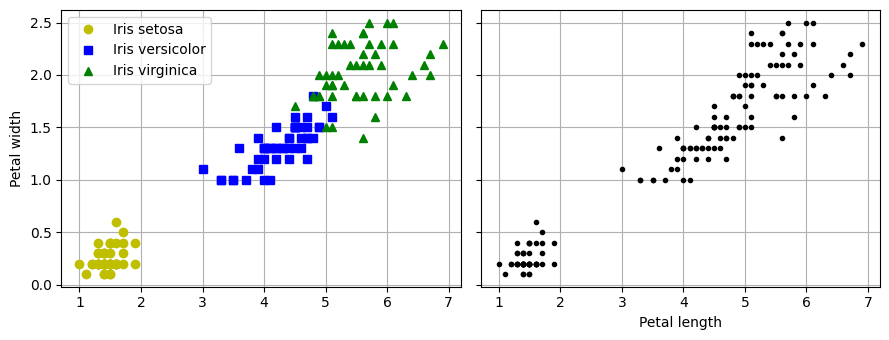

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")  # Iris setosa: 노란 점
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")  # Iris versicolor: 파란 사각형
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")  # Iris virginica: 초록 삼각형
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")  # 클래스 정보를 제거한 상태로 모든 샘플을 검정 점으로 표시
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

save_fig("classification_vs_clustering_plot")  # 분류와 클러스터링 비교 그림 저장
plt.show()


- 왼쪽  
아이리스 데이터셋  
각 개체의 종(클래스)이 다른 마커로 표시된 라벨 있음  
로지스틱 회귀, SVM, 랜덤 포레스트 분류기 같은 분류 알고리즘이 적합
  
- 오른쪽  
동일한 데이터셋에서 라벨 제거  
분류 알고리즘 사용 불가 -> 클러스터링 알고리즘 사용

이 데이터셋에는 시각화에 나타나지 않은 두 개의 추가 특징 있음: 꽃받침의 길이, 너비  

클러스터링 알고리즘은 **모든 특성(feature)** 활용 가능  
 **가우시안 혼합 모델(Gaussian Mixture Model)** 등을 사용하면
150개 중 단 5개만 잘못된 클러스터에 할당될 정도로
세 개의 클러스터를 꽤 정확하게 식별 가능

다양한 클러스터링 활용 분야

- 고객 세분화  
고객의 구매 내역이나 웹사이트 활동을 기준으로 고객 클러스터링  
고객이 누구이고 무엇을 원하는지 이해 가능  
각 세그먼트에 맞게 제품 및 마케팅 전략을 조정 가능  
예: 추천 시스템에서 같은 클러스터의 사용자가 좋아한 콘텐츠를 추천

- 데이터 분석  
새로운 데이터셋을 분석할 때 클러스터링 먼저 수행  
이후 각 클러스터별로 따로 분석하면 통찰력 도출에 유리

- 차원 축소 기법  
클러스터링 후 각 샘플이 각 클러스터에 속하는 정도(affinity) 계산  
원래의 특성 벡터 𝑥를 클러스터 친화도 벡터로 대체 가능  
클러스터 수가 𝑘라면 이 벡터는 𝑘차원  
원래 벡터보다 차원이 낮지만 중요 정보 유지 가능

- 이상치 탐지(outlier detection)  
어떤 클러스터에도 잘 속하지 않는 샘플은 이상치일 가능성 높음  
예: 사용자 행동을 기준으로 클러스터링한 뒤,  
과도한 요청을 보내는 사용자 등 비정상적 행동 탐지  
제조 결함 감지나 금융 사기 탐지 등에 특히 유용  

- 반지도 학습(semi-supervised learning)  
라벨이 적을 경우 클러스터링 후 같은 클러스터 내 샘플에 라벨 전파  
지도 학습에 사용할 수 있는 라벨 수 증가 → 성능 향상  

- 검색 엔진에 활용  
기준 이미지를 바탕으로 유사한 이미지를 찾는 기능 구현 가능  
먼저 전체 이미지 데이터베이스에 클러스터링 수행  
사용자가 기준 이미지를 제공하면, 해당 클러스터에 속한 이미지 반환

- 이미지 분할(image segmentation)  
픽셀을 색상 기준으로 클러스터링 후, 각 픽셀을 클러스터 평균 색상으로 대체  
이미지 색상 수를 크게 줄일 수 있음  
객체 탐지 및 추적 시스템에서 윤곽 검출을 쉽게 하기 위해 사용

- 클러스터의 정의는 상황에 따라 달라짐  
특정 중심점(centroid)을 기준으로 모이는 형태를 찾는 알고리즘도 있고  
밀집된 연속 영역을 클러스터로 보는 알고리즘도 있음  
일부는 계층적 구조를 기반으로 클러스터 내에 클러스터를 구성하기도 함

대표적인 클러스터링 알고리즘인 **K-평균(K-Means)**과 DBSCAN을 살펴보고  
비선형 차원 축소, 반지도 학습, 이상치 탐지 같은 활용 사례 확인

### K-Means

아래에 라벨이 없는 데이터셋을 보면
다섯 개의 뚜렷한 밀집된 영역(블롭) 확인 가능

K-평균(K-Means) 알고리즘은 이러한 유형의 데이터셋을 빠르고 효율적으로 클러스터링 가능
보통 몇 번의 반복(iteration)만으로 수렴

이 알고리즘은 1957년 벨 연구소(Bell Labs)의 Stuart Lloyd가
펄스 부호 변조(pulse-code modulation) 기법의 일환으로 제안  
1982년에 회사 외부에 정식으로 공개됨

1965년 Edward W. Forgy가 본질적으로 동일한 알고리즘을 발표  
K-평균은 때때로 **Lloyd–Forgy** 알고리즘이라고도 불림

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # K-평균 모델 생성(클러스터 수 5, 10번 초기화 시도)
y_pred = kmeans.fit_predict(X)  # X에 대해 클러스터링 수행 후 예측값 반환


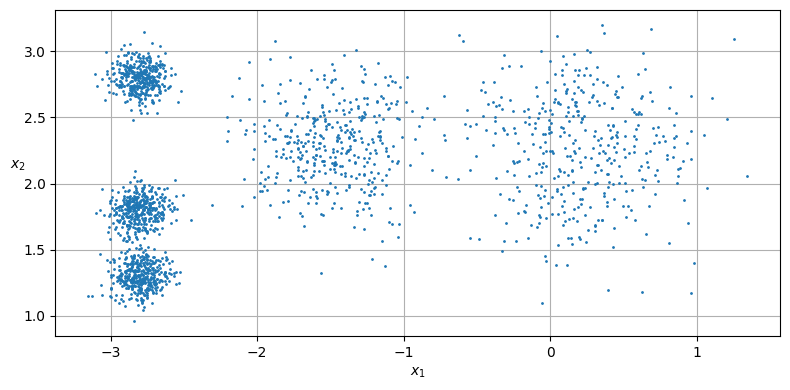

In [8]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)  # 클러스터 또는 라벨(y)에 따라 X 데이터 시각화 (없으면 단색)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)  # X 데이터 시각화
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("blobs_plot")


이 데이터셋에 K-평균 클러스터링을 학습시키면
알고리즘은 각 블롭의 중심을 찾고
각 샘플을 가장 가까운 블롭(즉, 클러스터)에 할당하려 시도

이처럼 K-평균을 사용할 때는 **찾고자 하는 클러스터 수
𝑘**를 반드시 지정해야 함

지금 예제에서는 데이터를 보면 𝑘=5가 명확하지만 일반적인 경우에는 X

각 샘플은 다섯 개 클러스터 중 하나에 할당

클러스터링에서의 샘플의 레이블: 해당 샘플이 속한 클러스터의 인덱스 의미  
=/= 분류(classification)에서의 클래스 레이블(클러스터링은 비지도 학습)



In [9]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [10]:
y_pred is kmeans.labels_

True

In [15]:
# 알고리즘이 찾은 다섯 개 클러스터의 중심(centroid)
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [12]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [16]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) # 새로운 샘플
kmeans.predict(X_new) # 각 샘플을 가장 가까운 클러스터에 쉽게 할당

array([4, 4, 3, 3], dtype=int32)

클러스터의 **결정 경계(decision boundary)**를 시각화하면  
각 중심점을 기준으로 영역이 나뉘는 **보로노이 분할(Voronoi tessellation)** 생김(각 중심은 X로 표시)

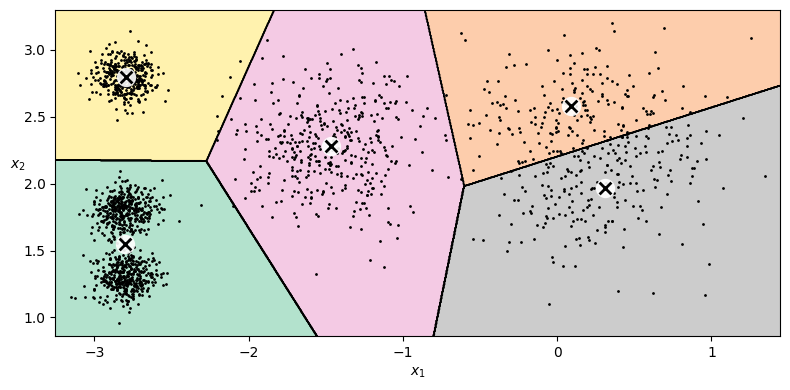

In [17]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)  # 데이터 포인트를 작은 검은 점으로 그림

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]  # 중요도 낮은 중심은 제외
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)  # 중심을 흰 원으로 표시
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)  # 중심을 검은 X로 중첩 표시

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))  # 격자 생성
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])  # 격자 위 각 점에 대해 클러스터 예측
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")  # 클러스터 영역을 색으로 채움
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')  # 경계선 그리기
    plot_data(X)  # 데이터 포인트 그리기
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)  # 중심 표시

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)  # K-평균 클러스터 경계 및 중심 시각화
save_fig("voronoi_plot")  # 보로노이 다이어그램 그림 저장
plt.show()

대부분의 샘플은 적절한 클러스터에 명확히 할당  
일부 샘플은 잘못된 클러스터에 할당되었을 가능성 있음  
→ 특히 왼쪽 위 클러스터와 가운데 클러스터 사이의 경계 근처에서 발생

K-평균 알고리즘의 한계  
- 클러스터의 **지름(diameter)**이 서로 다를 때 성능 저하  
- K-평균은 오직 중심점까지의 거리만을 기준으로 클러스터 결정  

**하드 클러스터링(hard clustering)**: 각 샘플을 하나의 클러스터에만 할당(K-평균)

때로는 각 샘플이 각 클러스터에 속할 가능성 또는 유사도를 가지는 방식이 더 유용  
→ **소프트 클러스터링(soft clustering)**

점과 중심점 간의 거리 또는 **유사도(affinity)**를 사용해 클러스터에 속할 정도를 나타낼 수 있음
(예: 가우시안 RBF)

KMeans 클래스의 transform() 메서드는
각 샘플이 각 중심점과 얼마나 떨어져 있는지를 계산해줌:

### Limits of K-Means

### Using Clustering for Image Segmentation

### Using Clustering for Preprocessing

### Using Clustering for Semi-Supervised Learning

### DBSCAN

### Other Clustering Algorithms

## Gaussian Mixtures

### Anomaly Detection Using Gaussian Mixtures

### Selecting the Number of Clusters

### Bayesian Gaussian Mixture Models

### Other Algorithms for Anomaly and Novelty Detection